### パラメータ推定 s1 only

In [5]:
random_seed_cmb = 1
random_seed_cmb = 1
nside = 4
r = 0.;

In [6]:
# litebirdの周波数を選んで
# 色々なバンドで試す

freq_band_case1 = [40, 68, 100]
freq_band_case2 = [40, 50, 100]
which_model = "s1"
cmb_freq = 100;

In [7]:
include("../../src/function/smoothing_main_function.jl");

In [8]:
using NPZ

@time cov_mat_scal = npzread("../../covariance_matrix/smoothing_cov_mat_scal.npy")
@time cov_mat_tens = npzread("../../covariance_matrix/smoothing_cov_mat_tens.npy");

  0.069661 seconds (155.17 k allocations: 12.724 MiB, 94.75% compilation time)
  0.001925 seconds (48 allocations: 2.254 MiB)


In [9]:
# スレッドセーフな計算 push!は使うな
using Base.Threads

times = 1000

r_array_case1 = zeros(times)
r_array_case2 = zeros(times)

beta_array_case1 = zeros(times)
beta_array_case2 = zeros(times)
;
accuracy_r, accuracy_like = 1e-5, 1e-2
m
@time @inbounds for seed in 1:times

    # r_like_estimate_fast(r_ini, num_iterations, random_seed_cmb, seed_syn, nside, r_input, freq_band, which_model, cmb_freq, cov_mat_scal, cov_mat_tens)
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r1, optimum_beta_s1, optimum_beta_d1, optimum_T_d1 = minimize_r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case1, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);
    r_array, beta_s_array, beta_d_array, T_d_array, optimum_r2, optimum_beta_s2, optimum_beta_d2, optimum_T_d2 = minimize_r_like_estimate_fast(0.001, 100, accuracy_r, accuracy_like, seed-1, seed-1, nside, r, freq_band_case2, which_model, cmb_freq, cov_mat_scal, cov_mat_tens);

    # case1 [40, 68, 100]
    r_array_case1[seed] = optimum_r1
    beta_array_case1[seed] = optimum_beta_s1

    # case2 [40, 50, 100]
    r_array_case2[seed] = optimum_r2
    beta_array_case2[seed] = optimum_beta_s2
    
    #print(seed)

end

12

3456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311312313314315316317318319320321322323324325326327328329330331332333334335336337338339340341342343344345346347348349350351352353354355356357358359360361362363364365366367368369370

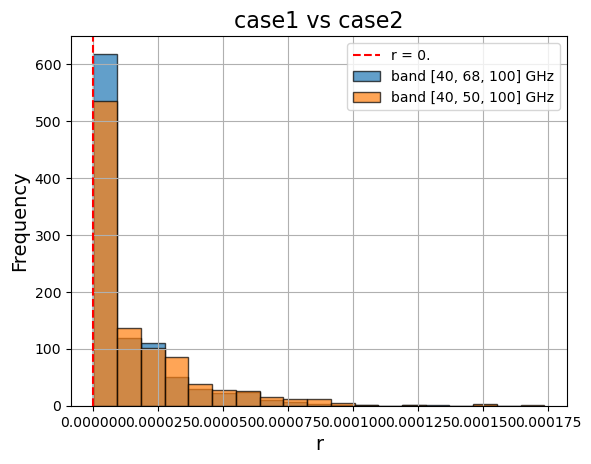

In [18]:
using PyPlot

min_range = minimum([r_array_case1; r_array_case2])
max_range = maximum([r_array_case1; r_array_case2])
bins = range(min_range, stop = max_range, length=20)

# r = 0.01
PyPlot.axvline(x = 0., color = "red", linestyle = "--", label = "r = 0.")

# histogram
hist(r_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(r_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

title("case1 vs case2", fontsize = 16)
xlabel("r", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

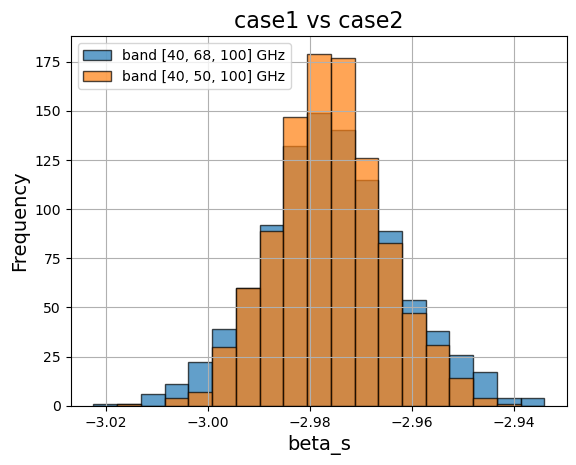

In [13]:
using PyPlot 

min_range = minimum([beta_array_case1; beta_array_case2])
max_range = maximum([beta_array_case1; beta_array_case2])
bins = range(min_range, stop = max_range, length=20)

# beta_s = -2.99
PyPlot.axvline(x = -2.99, color = "red", linestyle = "--", label = "beta_s = -2.99")

# histogram
hist(beta_array_case1, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 68, 100] GHz")
hist(beta_array_case2, bins = bins, alpha = 0.7, edgecolor = "black", label = "band [40, 50, 100] GHz")

title("case1 vs case2", fontsize = 16)
xlabel("beta_s", fontsize = 14)
ylabel("Frequency", fontsize = 14)
PyPlot.grid(true)
PyPlot.legend()

show()

In [11]:
std(r_array_case1) * 1.96
std(r_array_case2) * 1.96

4.5364489443922655e-5

In [12]:
# 68%CL Δr
println("Δr_case1 =", std(r_array_case1))
println("Δr_case2 =", std(r_array_case2))

Δr_case1 =1.944779485581194e-5
Δr_case2 =2.3145147675470742e-5


In [ ]:
# 68%CL Δbeta_s
println("Δbeta_s_case1 =", std(beta_s_array_case1))
println("Δbeta_s_case2 =", std(beta_s_array_case2))

In [14]:
println("case1 r = ", mean(r_array_case1))
println("case2 r = ", mean(r_array_case2))

case1 r = 1.2253498689146641e-5
case2 r = 1.6232312889280843e-5


In [15]:
println("case1 beta = ", mean(beta_array_case1))
println("case2 beta = ", mean(beta_array_case2))

case1 beta = -2.9760111073129454
case2 beta = -2.9762041431953055
